<a href="https://colab.research.google.com/github/ZHAOTransparentAI/MaschinellesLernen/blob/main/Version_Space_for_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Feature 2')

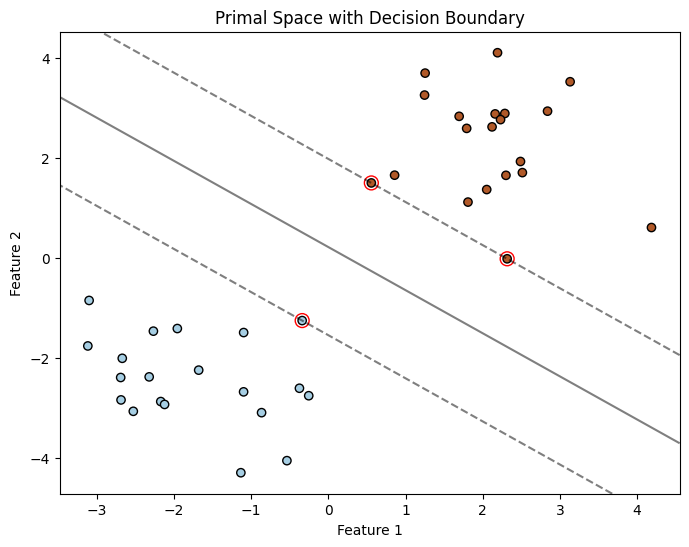

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a simple dataset
np.random.seed(1)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = np.array([0] * 20 + [1] * 20)  # Convert to NumPy array

# Fit the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

# Plot the original data points with the decision boundary
plt.figure(figsize=(8, 6))


plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor='k')
ax = plt.gca() #get current axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')
plt.title("Primal Space with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")



Classifier 1: 1.18x1 + -0.30x2 + 0.03 = 0
Classifier 2: 2.37x1 + -0.73x2 + 0.09 = 0
Classifier 3: 4.73x1 + -1.67x2 + 0.34 = 0


<ipython-input-30-e0d572a736bf>:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors=colors[idx], linestyles=['-'], label=f'Classifier {idx+1}')
<ipython-input-30-e0d572a736bf>:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors=colors[idx], linestyles=['-'], label=f'Classifier {idx+1}')
<ipython-input-30-e0d572a736bf>:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors=colors[idx], linestyles=['-'], label=f'Classifier {idx+1}')


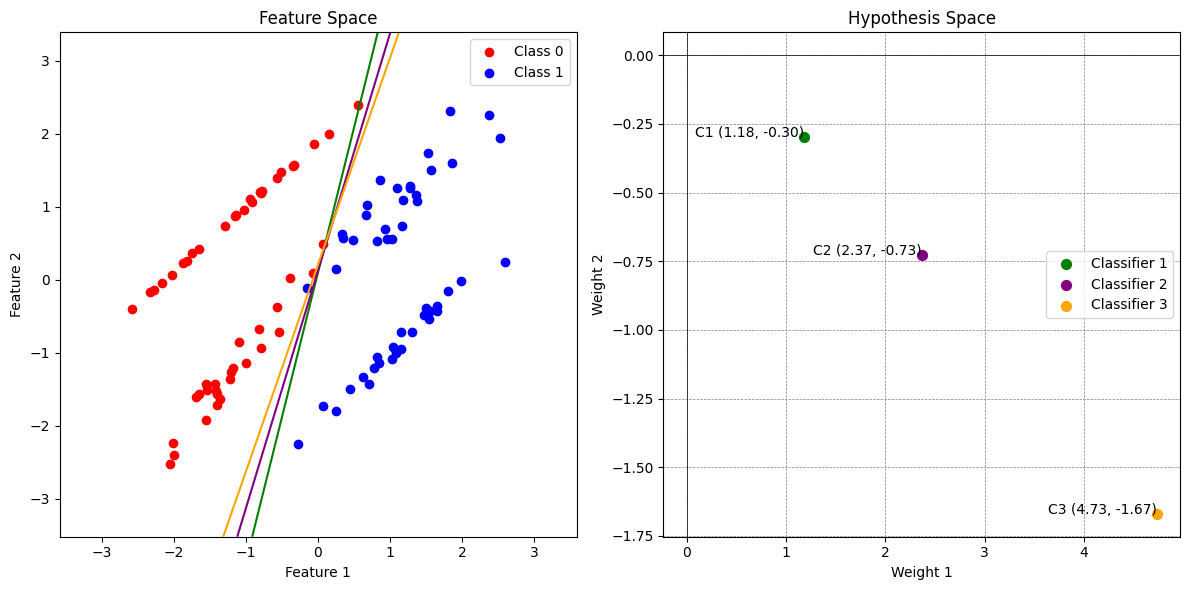

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate example data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X1, X2 = X[y == 0], X[y == 1]

# Define three different SVM classifiers
classifiers = [
    SVC(kernel='linear', C=0.1),
    SVC(kernel='linear', C=1.0),
    SVC(kernel='linear', C=10.0)
]

# Train classifiers and get weights and intercepts
weights = []
intercepts = []
for clf in classifiers:
    clf.fit(X, y)
    weights.append(clf.coef_[0])
    intercepts.append(clf.intercept_[0])

# Print classifiers' equations
for idx, (w, b) in enumerate(zip(weights, intercepts)):
    print(f"Classifier {idx+1}: {w[0]:.2f}x1 + {w[1]:.2f}x2 + {b:.2f} = 0")

# Plot feature space
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 1')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

colors = ['green', 'purple', 'orange']
for idx, clf in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors=colors[idx], linestyles=['-'], label=f'Classifier {idx+1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Space')
plt.legend()

# Plot hypothesis space in standard coordinate system
plt.subplot(122)

for i, (w, b) in enumerate(zip(weights, intercepts)):
    plt.scatter(w[0], w[1], color=colors[i], label=f'Classifier {i+1}', s=50)
    plt.text(w[0], w[1], f'C{i+1} ({w[0]:.2f}, {w[1]:.2f})', fontsize=10, ha='right')

plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Hypothesis Space')

plt.legend()
plt.tight_layout()
plt.show()
